In [2]:
import pandas as pd
df_train = pd.read_csv("train_merged[961-1120].csv")
df_test = pd.read_csv("test_merged[961-1120].csv")

In [3]:
df_train.head()

,user_id,merchant_id,label,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
0,344706,1825,0,1056812,451,472,2471,1103,0,5,0
1,344706,1825,0,1067615,451,3334,6352,1103,0,5,0
2,344706,1825,0,726039,276,2026,3979,1103,0,5,0
3,344706,1825,0,844714,451,472,2471,1103,0,5,0
4,344706,1825,0,329731,1344,327,1954,808,0,5,0


In [4]:
df_test.head()

,user_id,merchant_id,prob,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
0,284802,2173,NaN,643289,612,141,3614,828,0,0,2
1,284802,2173,NaN,570805,1577,141,3614,828,0,0,2
2,284802,2173,NaN,658620,302,606,376,828,0,0,2
3,284802,2173,NaN,262870,662,606,376,828,3,0,2
4,284802,2173,NaN,934812,612,141,3614,828,3,0,2


<AxesSubplot:>

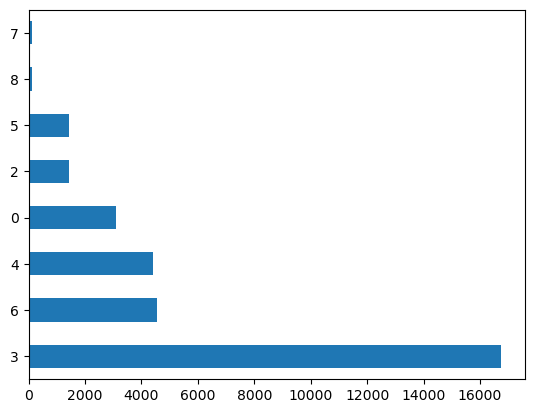

In [5]:
df_train['age_range'].value_counts().plot(kind='barh')

In [7]:
df_train.describe()

,user_id,merchant_id,label,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
count,31824.000000,31824.000000,31824.000000,3.182400e+04,31824.000000,31824.000000,31824.000000,31824.000000,31824.000000,31824.000000,31824.000000
mean,117121.824189,2874.635684,0.169715,5.537354e+05,872.487211,2337.699284,4140.029443,914.203369,0.248492,3.351087,0.987494
std,120343.984846,1550.165607,0.375388,3.220121e+05,463.433310,1518.849873,2347.828431,190.497599,0.754022,1.593263,0.929448
min,18306.000000,66.000000,0.000000,2.000000e+00,2.000000,1.000000,9.000000,511.000000,0.000000,0.000000,0.000000
25%,18306.000000,1425.000000,0.000000,2.779730e+05,429.000000,968.000000,2061.000000,728.000000,0.000000,3.000000,0.000000
50%,38787.000000,2928.000000,0.000000,5.547530e+05,821.000000,2200.000000,4100.000000,1003.000000,0.000000,3.000000,1.000000
75%,225666.000000,4427.000000,0.000000,8.262680e+05,1280.000000,3741.250000,6116.000000,1108.000000,0.000000,4.000000,2.000000
max,423042.000000,4992.000000,1.000000,1.112891e+06,1671.000000,4995.000000,8476.000000,1111.000000,3.000000,8.000000,2.000000


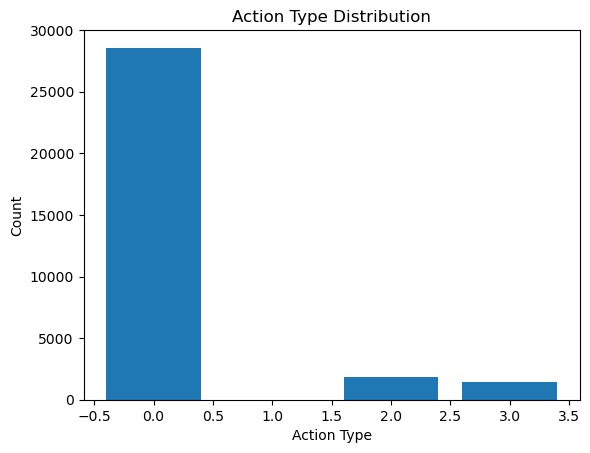

In [9]:
import matplotlib.pyplot as plt
# Create a bar chart to show the distribution of the action types
action_counts = df_train['action_type'].value_counts()
plt.bar(action_counts.index, action_counts.values)
plt.title('Action Type Distribution')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.show()

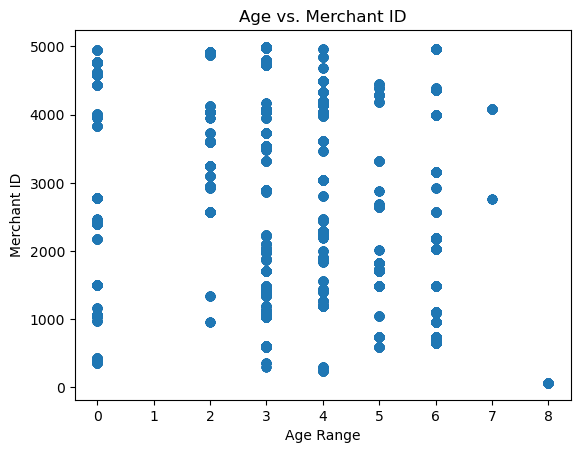

In [10]:
# Create a scatter plot to show the relationship between age and merchant ID
plt.scatter(df_train['age_range'], df_train['merchant_id'])
plt.title('Age vs. Merchant ID')
plt.xlabel('Age Range')
plt.ylabel('Merchant ID')
plt.show()

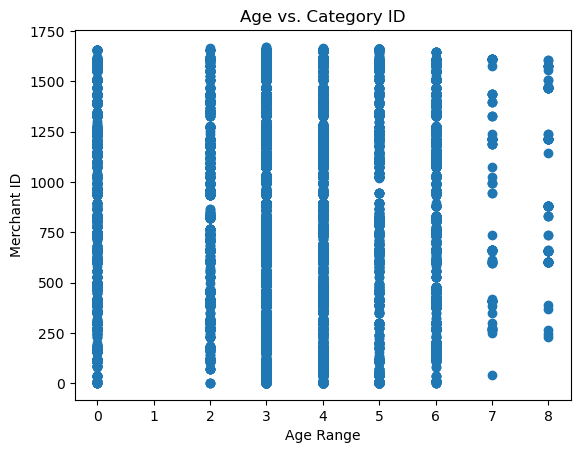

In [41]:
# Create a scatter plot to show the relationship between age and Cat ID
plt.scatter(df_train['age_range'], df_train['cat_id'])
plt.title('Age vs. Category ID')
plt.xlabel('Age Range')
plt.ylabel('Merchant ID')
plt.show()

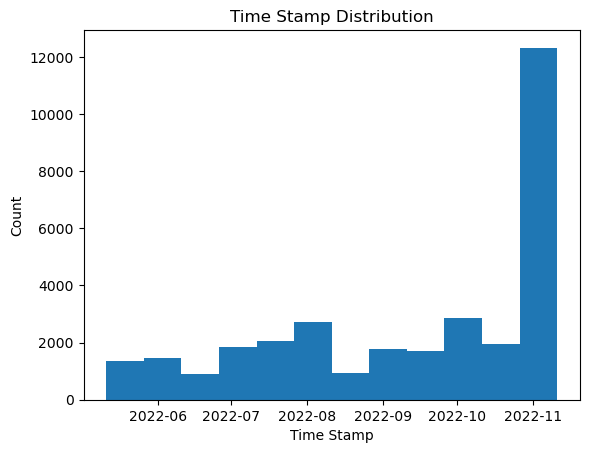

In [51]:
df_train['time_stamp'] = pd.to_datetime(df_train['time_stamp'], format='%m%d').apply(lambda x: x.replace(year=2022))
# Create a histogram to show the distribution of time stamps
plt.hist(df_train['time_stamp'],bins=12)
plt.title('Time Stamp Distribution')
plt.xlabel('Time Stamp')
plt.ylabel('Count')
plt.show()

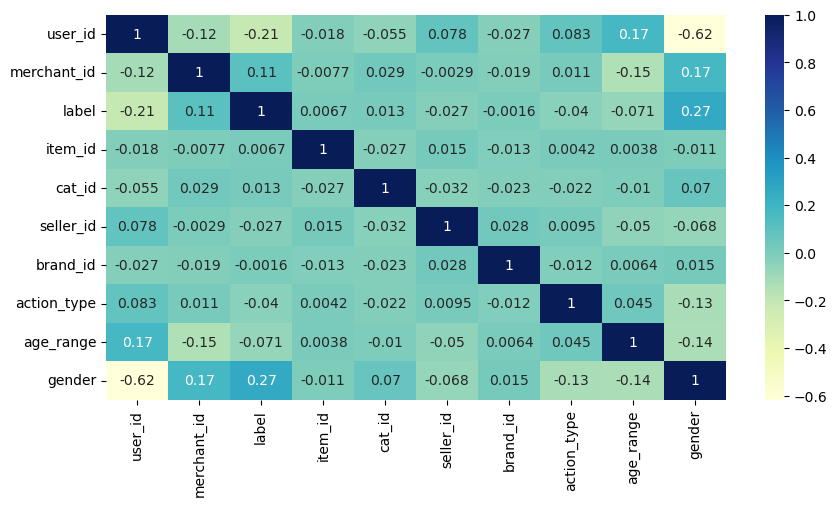

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
# plotting correlation heatmap
dataplot = sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True,)

# displaying heatmap
plt.show()